### Problem 1

a) Code the Conjugate Gradient Method and apply it to solve a simple $$Hx=b$$ system, with H’s dimension as 10×10.

In [5]:
# r_k = Hx - b
import numpy as np

epsilon_threshhold = 0.001

def conjugate_gradient(H,b,initial_point = np.array([[3],[1]])):

    x_k = initial_point
    r_k = np.matmul(H,initial_point) - b
    p_k = -r_k

    while np.linalg.norm(r_k) > epsilon_threshhold:
        
        a_k_num = -np.matmul(r_k.T,p_k)
        a_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        a_k = a_k_num / a_k_denom


        x_k = x_k + a_k*p_k
        r_k = np.matmul(H,x_k) - b



        b_k_num = np.matmul(p_k.T,np.matmul(H,r_k))
        b_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))

        b_k = b_k_num / b_k_denom

        p_k = -r_k + b_k*p_k


    print(x_k)



#H = np.array([[8,-2],[-2,2]])
#initial_point = np.array([[3],[1]])
#b = np.array([[1],[1]])

H = np.array([[ 2.5409,-0.0113],
  [-0.0113,0.5287]])
b = np.array([[1.3864], [0.3719]])
initial_point  = np.array([[-3],[-4]])

conjugate_gradient(H,b,initial_point)


[[0.5488139 ]
 [0.71515339]]


b) Construct  matrices  with  various  eigenvalue  distributions  (clustered  and  non-clustered)and apply the above CG method to them.  Comment on the behaviour of the CG method in terms of convergence.

### Question 2

 Your start-up will face the cash requirements shown in Table 1 in the next eight quarters(positive entries represent cash needs while negative entries represent cash surpluses).The company has three borrowing possibilities.

|   Q1	|   Q2	|  Q3 	|   Q4	|   Q5	| Q6  | Q7 | Q8 |  
|---	|---	|---	|---	|---	|---  |--- |--- |
|   100	|   500	|  100 	|  -600 	|  -500 	|  200  | 600   | -900   |

- a 2-year loan available at the beginning of Q1, with a 1% interest per quarter.
- The other two borrowing opportunities are available at the beginning of every quarter: a 6-monthloan with a 1.8% interest per quarter, and a quarterly loan with a 2.5% interest for the quarter.

a)  Write a program that implements the revised simplex algorithm.


In [5]:
import numpy as np
def revised_simplex(A,b,c,b_vars,nb_vars):

    # For storing the final result
    final_ans = np.zeros((len(b_vars) + len(nb_vars),))

    while True:

        # Get the Basis Matrix B and NonBasis Matrix N
        B = A[:,b_vars]
        N = A[:,nb_vars]

        # Compute x_B , lambda and s_N
        B_inverse = np.linalg.inv(B)
        x_B = np.matmul(B_inverse,b)
        lambda_ = np.matmul(B_inverse.T,c[b_vars,:])
        s_N = c[nb_vars,:] - np.matmul(N.T,lambda_)

        # Check if we have reached a solution
        if (s_N>=0).all():
            return final_ans
        
        qidx = int(np.argmin(s_N,axis=0))
        q = nb_vars[qidx]
    
        d = np.matmul(B_inverse,np.expand_dims(A[:,q],axis=1))

        # Check if feasible region is bounded or not
        if (d<=0).all():
            print("The Feasible Region is Unbounded")
            return np.zeros((len(b_vars) + len(nb_vars),))


        
        xq_plus = float(np.min(x_B/d,axis=0)[0])
        pidx = np.argmin(x_B/d,axis=0)[0]
        p = b_vars[pidx]
        
        # Update the solution vector x
        x_B_plus = x_B - xq_plus*d
        print(x_B_plus)
        # Compute the solution vector x
        final_ans = np.zeros((len(b_vars) + len(nb_vars),))
        for i in range(len(x_B_plus)):
            final_ans[b_vars[i]] = x_B_plus[i,0]
        final_ans[q] = xq_plus
        # Swap between p and q 
        tmp = b_vars[pidx]
        b_vars[pidx] = nb_vars[qidx]
        nb_vars[qidx] = tmp

        # Sort the indices of the Basic and Non Basic Variables
        b_vars.sort()
        nb_vars.sort()


In [14]:
def get_initial_feasible_point(A,b,c):

    e = np.zeros((A.shape[1]+A.shape[0],1),dtype=np.int64)
    e[A.shape[1]:,:] = 1
    A_new = np.zeros((A.shape[0],A.shape[1]+A.shape[0]))
    A_new[:A.shape[0],:A.shape[1]] = A.copy()
    A_new[:A.shape[0] , A.shape[1]:] = np.eye(A_new.shape[0])
    
    b_vars = [i for i in range(A.shape[1],A.shape[1]+A.shape[0],1)]
    nb_vars = [i for i in range(A.shape[1])]

    solution = revised_simplex(A_new,b,c,b_vars,nb_vars)

    flag = True
    for i in range(len(nb_vars)):
        if (float(solution[nb_vars[i]])!=float(0.0)):
            flag = False
            break

    return flag,solution


In [15]:
A = np.array([[1,1,1,0],[2,0.5,0,1]])
b = np.array([[5],[8]])
c = np.array([[-4],[-2],[0],[0]])
b_vars = [2,3]
nb_vars = [0,1]

get_initial_feasible_point(A,b,c)
#ans = revised_simplex(A,b,c,b_vars,nb_vars)

[4, 5]
[0, 1, 2, 3]
[[1.  1.  1.  0.  1.  0. ]
 [2.  0.5 0.  1.  0.  1. ]]
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]]


In [10]:
mat

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

### Question 3

a) Consider the problem

$$
min \text{  } x_{1}^{2}+ 2x_{2}^{2} − 2x_{1}−6x_{2}−2x_{1}x_{2},
$$

such that
$$
x_{1} + x_{2} \le 2
$$
$$
-x_{1} + 2x_{2} \le 2

$$

$$
x_{1},x_{2} >= 0 
$$

Solve geometrically (Plot the geometry and solution points to visualize)

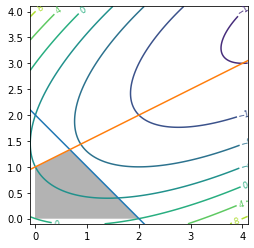

In [45]:
import matplotlib.pyplot as plt


d = np.linspace(-0.1,4.1,5000)
x1,x2 = np.meshgrid(d,d)

plt.imshow( (( (x1 + x2) <= 2) & ((-x1 + 2*x2) <= 2) & (x1>=0) & (x2>=0) ).astype(int) , 
                extent=(x1.min(),x2.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

x1_ = np.linspace(-0.1,4.1,500)
x2_1 = 2 - x1_ 
x2_2 = (2 + x1_)/2

z = x1**2 + 2*(x2**2) - 2*x1 - 6*x2 - 2*x1*x2 

cs = plt.contour(x1,x2,z)
plt.plot(x1_,x2_1, label=r'$x1+x2\leq2$')
plt.plot(x1_,x2_2, label=r'$-x1+2x2\leq2$')
plt.clabel(cs,inline=True, fontsize='smaller')
plt.xlim(-0.1,4.1)
plt.ylim(-0.1,4.1)

plt.show()